In [5]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [9]:
#loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [11]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
len(diabetes_data)

768

In [17]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

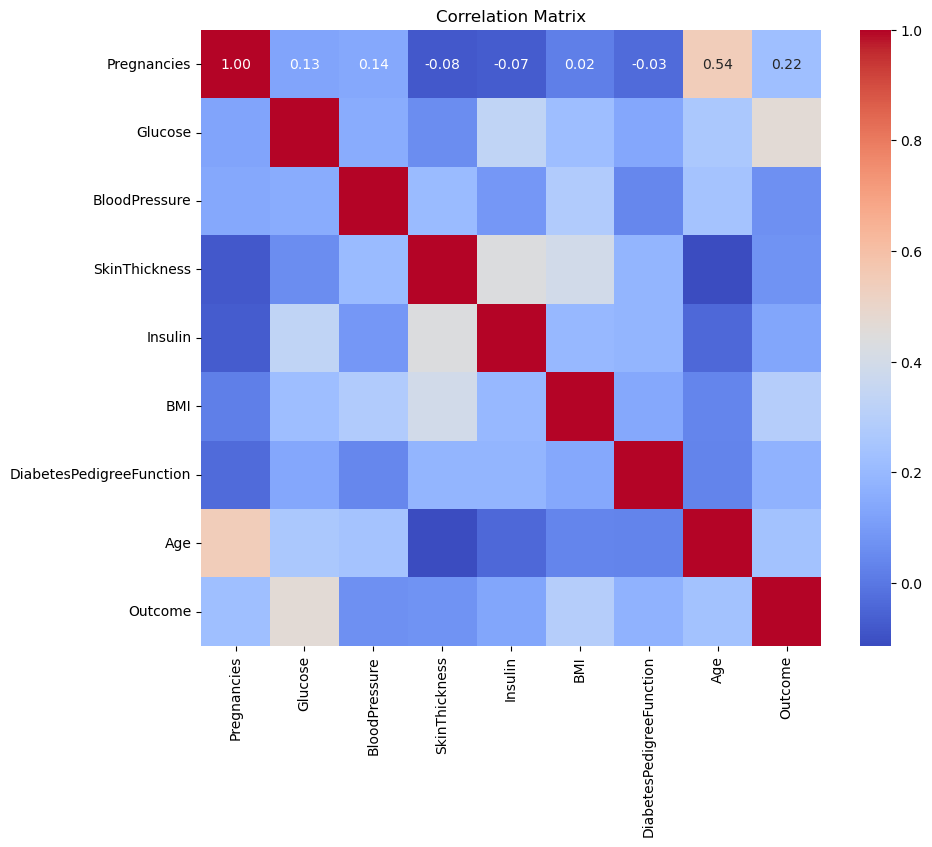

In [21]:
#Correlation matrix
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

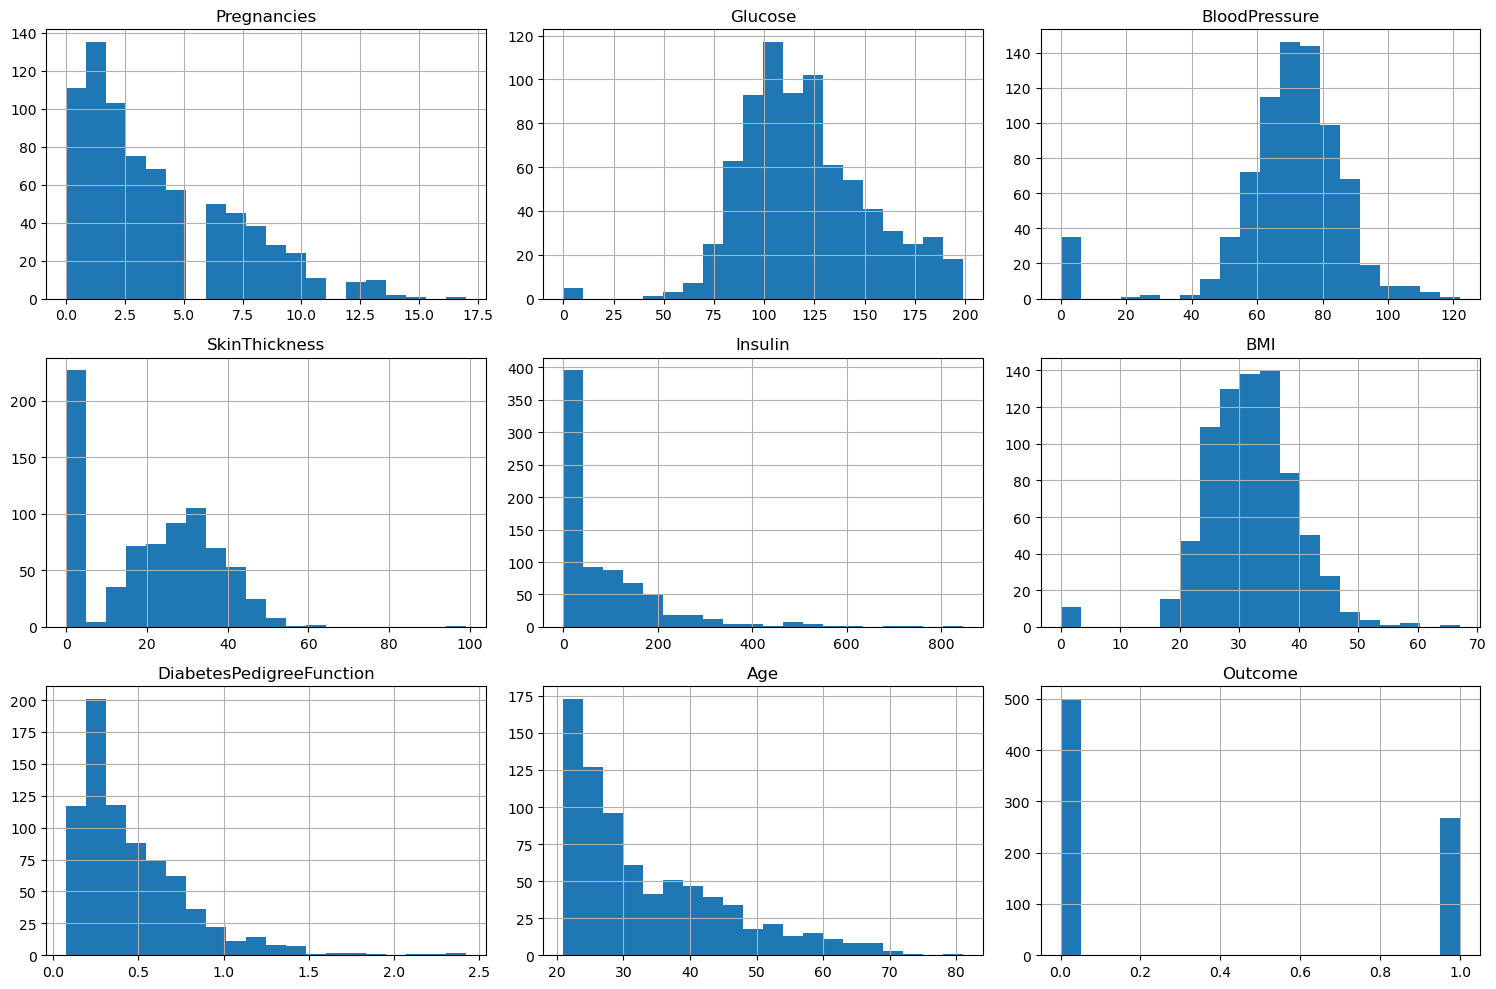

In [23]:
#Distribution plots
diabetes_data.hist(bins=20, figsize=(15,10), layout=(3,3))
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

Text(0.5, 1.0, 'Box Plot of Pregnancies')

<Axes: >

<Axes: xlabel='Outcome', ylabel='Glucose'>

Text(0.5, 1.0, 'Box Plot of Glucose')

<Axes: >

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

Text(0.5, 1.0, 'Box Plot of BloodPressure')

<Axes: >

<Axes: xlabel='Outcome', ylabel='BMI'>

Text(0.5, 1.0, 'Box Plot of BMI')

<Axes: >

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

Text(0.5, 1.0, 'Box Plot of DiabetesPedigreeFunction')

<Axes: >

<Axes: xlabel='Outcome', ylabel='Age'>

Text(0.5, 1.0, 'Box Plot of Age')

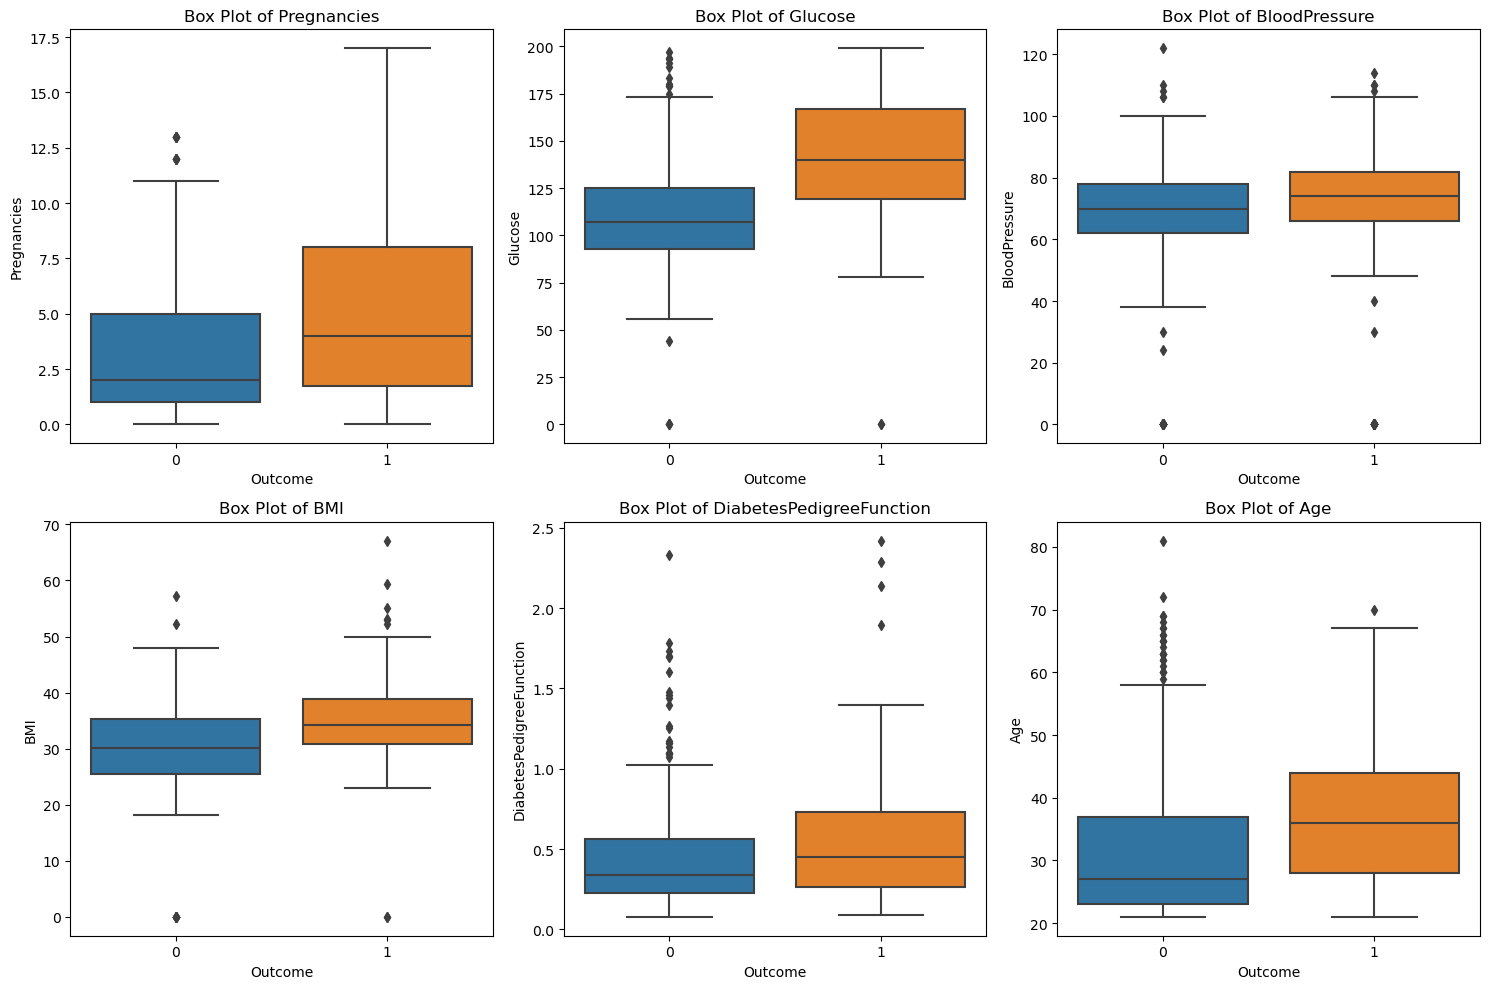

In [27]:
# Box plots for each feature to identify outliers
plt.figure(figsize=(15, 10))
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i, column in enumerate(columns_to_plot[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=column, data=diabetes_data)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of Pregnancies vs Outcome')

<Axes: >

<Axes: xlabel='Glucose', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of Glucose vs Outcome')

<Axes: >

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of BloodPressure vs Outcome')

<Axes: >

<Axes: xlabel='BMI', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of BMI vs Outcome')

<Axes: >

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of DiabetesPedigreeFunction vs Outcome')

<Axes: >

<Axes: xlabel='Age', ylabel='Outcome'>

Text(0.5, 1.0, 'Scatter Plot of Age vs Outcome')

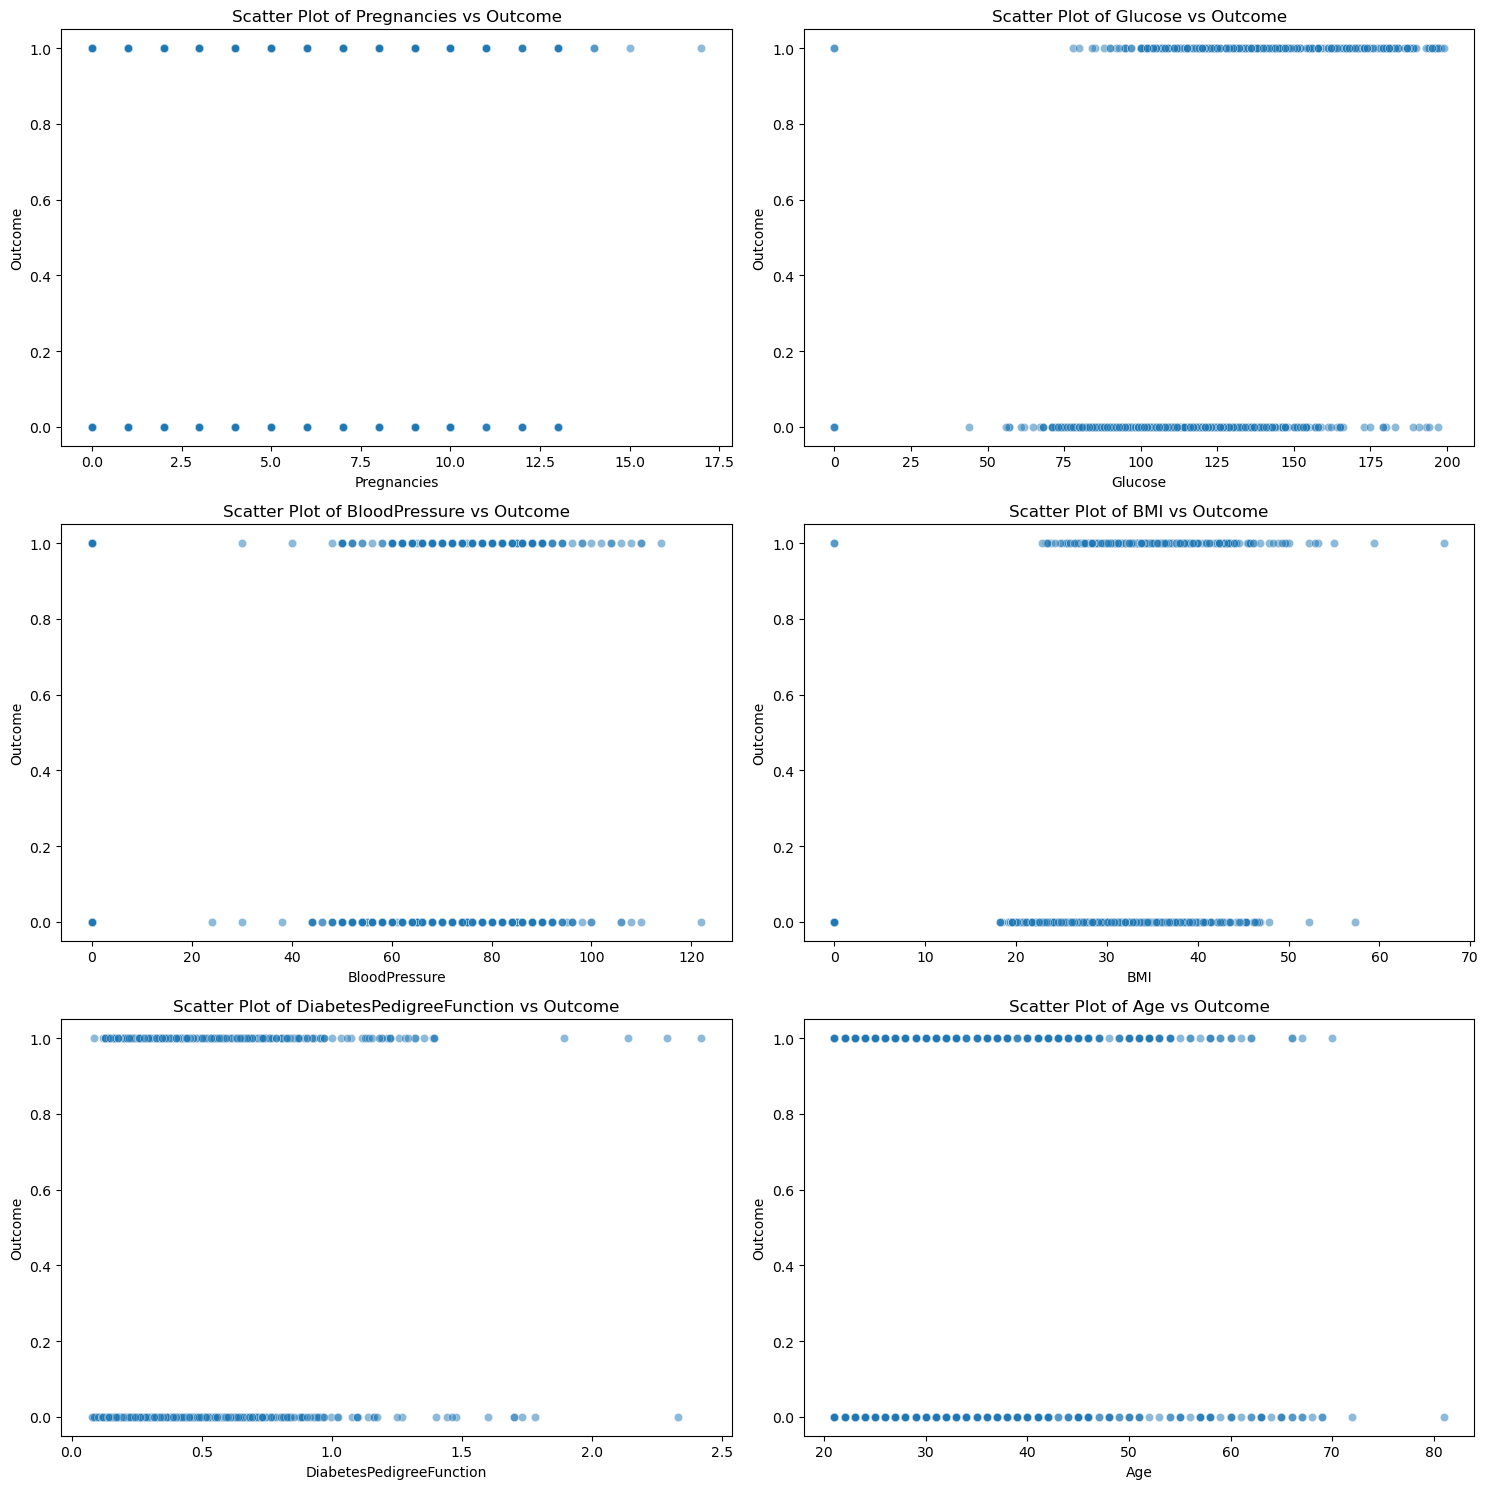

In [29]:
# Scatter plots for pairs of features against the outcome
plt.figure(figsize=(15, 15))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=feature, y='Outcome', data=diabetes_data, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Outcome')
plt.tight_layout()
plt.show()